Logistic Regression and its implementation in Python

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
sum(df.duplicated())

1081

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.drop('Time', axis=1, inplace=True)

In [8]:
X = df.iloc[:,df.columns != 'Class']
y = df.Class

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=5, stratify=y)

In [10]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

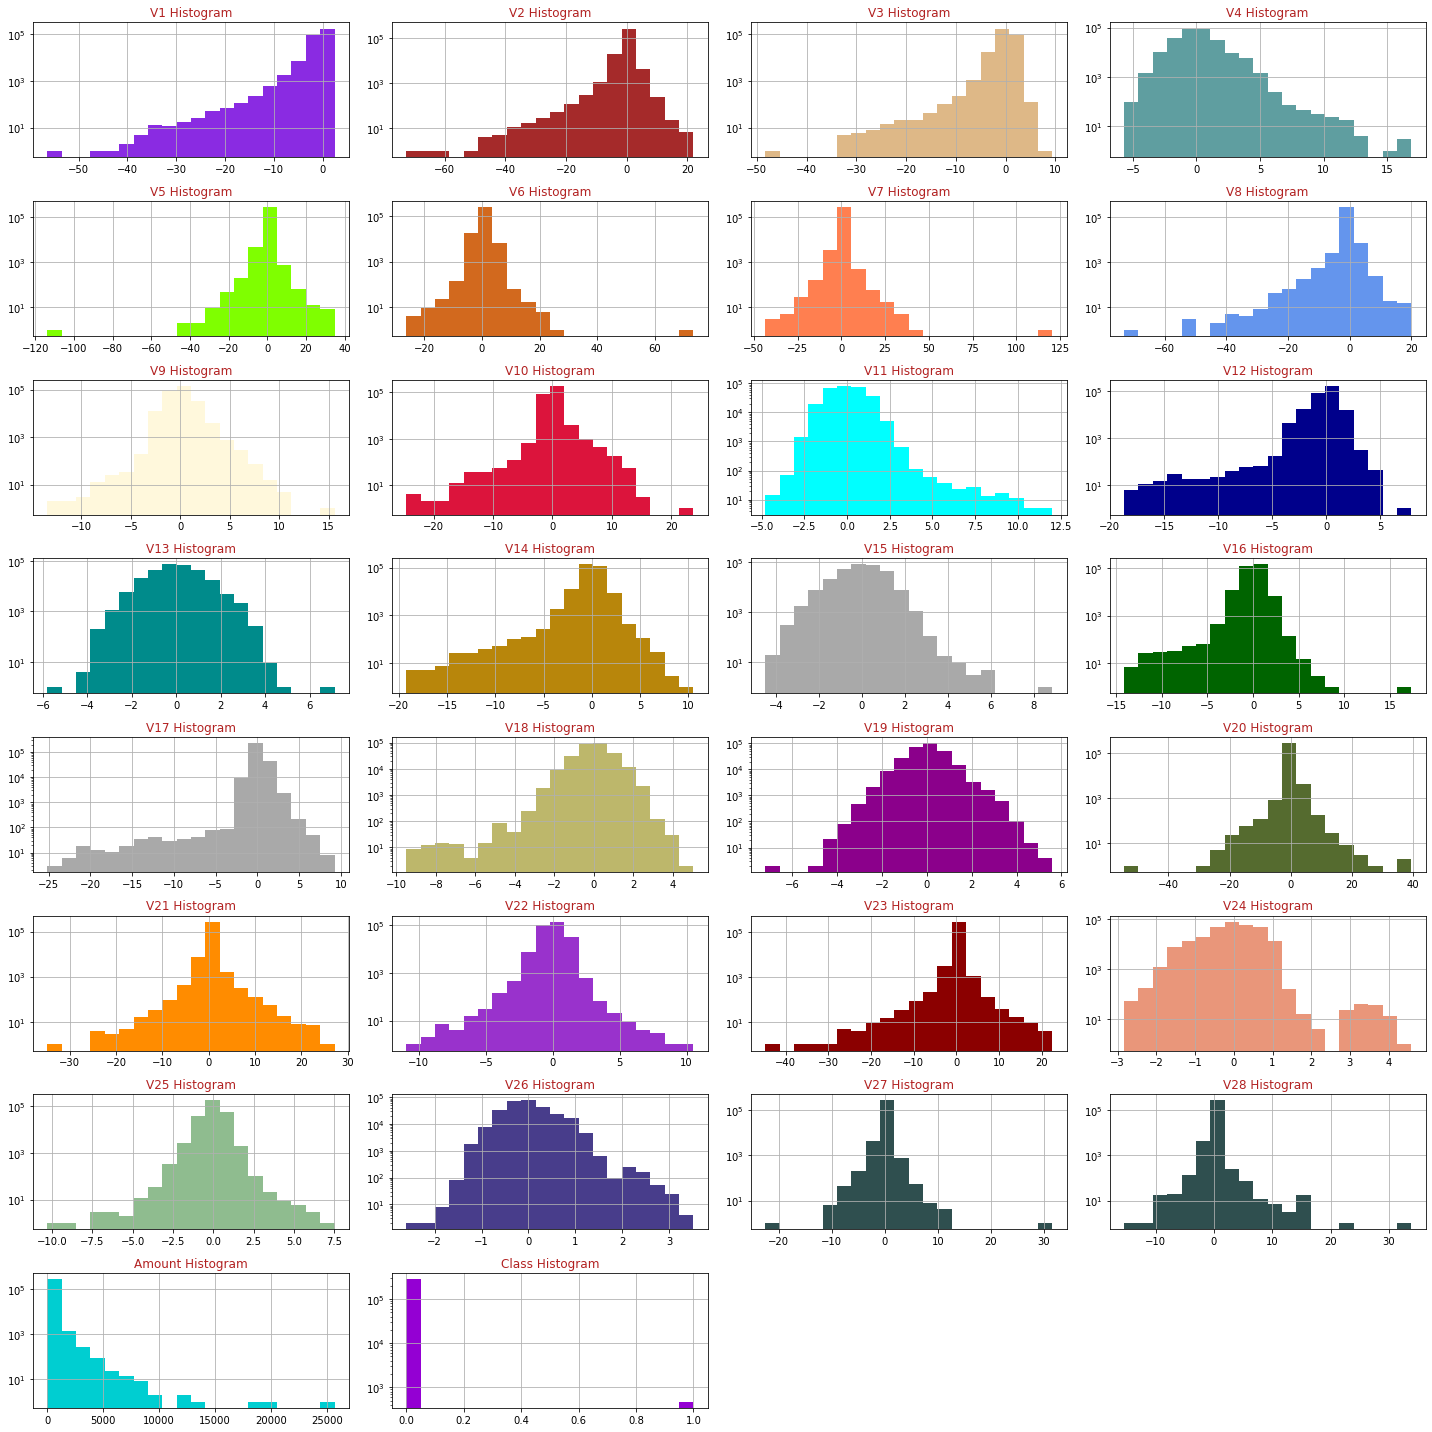

In [12]:
#Exploratory Data Visualization
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    plt.savefig('Histograms.png')
    plt.show()
draw_histograms(df,df.columns,8,4)

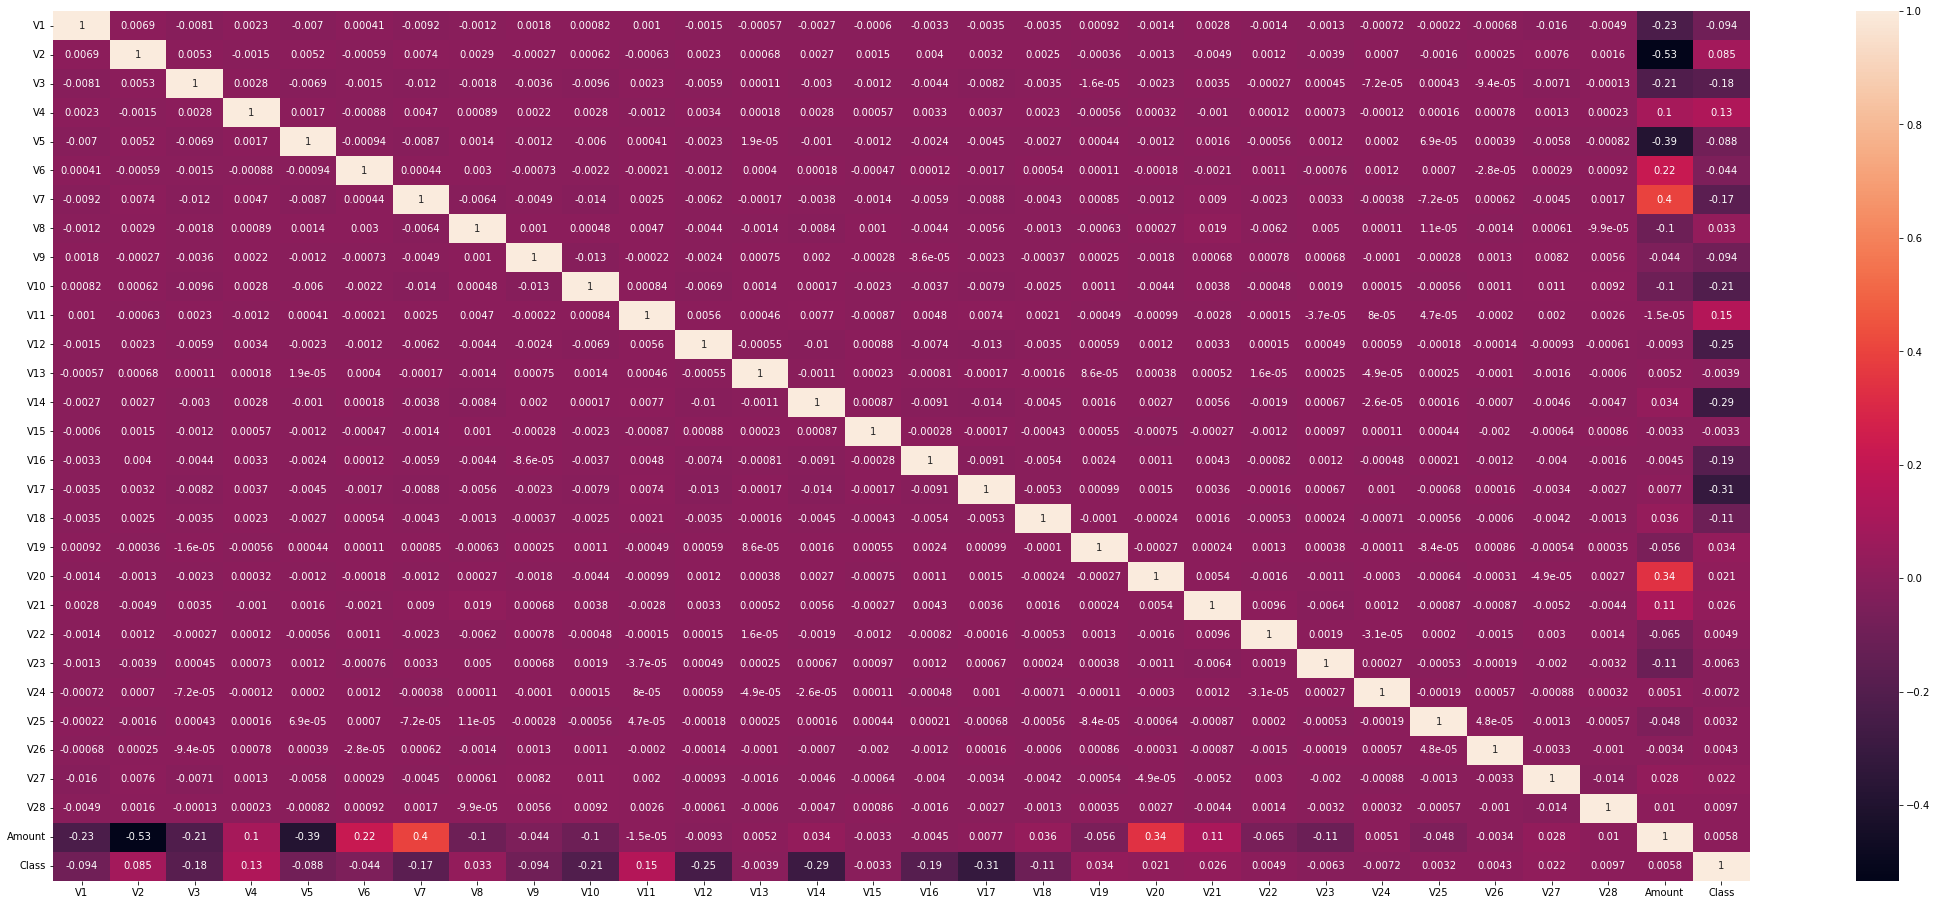

In [14]:
plt.figure(figsize = (38,16))
sns.heatmap(df.corr(), annot = True)
plt.savefig('heatmap.png')
plt.show()

In [15]:
model = LogisticRegression()

In [16]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [17]:
train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 99.92642523570359


In [19]:
train_acc = model.score(X_train_scaled, y_train)
print("The accuuracy for Training set is {}".format(train_acc*100))

The accuuracy for Training set is 99.92642523570359


In [31]:
y_pred = model.predict(X_test)

In [32]:
test_acc = accuracy_score(y_test, y_pred)
print("The accuuracy for Training set is {}".format(train_acc*100))

The accuuracy for Training set is 99.92642523570359


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.59      0.74     56651
           1       0.00      0.83      0.01        95

    accuracy                           0.59     56746
   macro avg       0.50      0.71      0.37     56746
weighted avg       1.00      0.59      0.74     56746



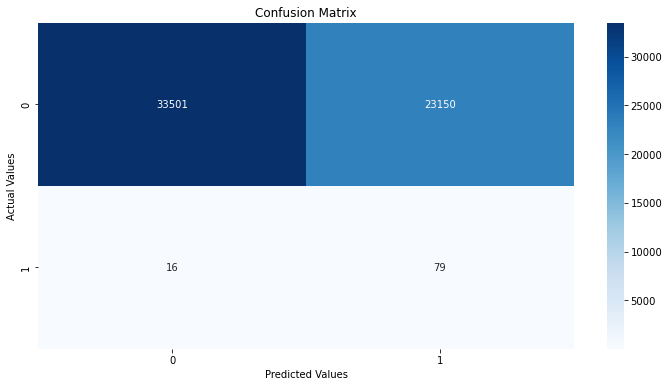

In [34]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

Implementing Kernel Support Vector Machine(SVM) with Scikit-Learn

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [49]:
import warnings

warnings.filterwarnings('ignore')

In [57]:
df = pd.read_csv('pulsar_data_test.csv')

In [59]:
df.shape

(5370, 9)

In [60]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,NaN
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,NaN
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,NaN
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,NaN
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,NaN


In [61]:
col_names = df.columns

col_names

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [62]:
df.columns = df.columns.str.strip()

In [63]:
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [64]:
df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [65]:
df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

In [66]:
df['target_class'].value_counts()

Series([], Name: target_class, dtype: int64)

In [67]:
df['target_class'].value_counts()/np.float(len(df))

Series([], Name: target_class, dtype: float64)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5370 entries, 0 to 5369
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          5370 non-null   float64
 1   IP Sd            5370 non-null   float64
 2   IP Kurtosis      4603 non-null   float64
 3   IP Skewness      5370 non-null   float64
 4   DM-SNR Mean      5370 non-null   float64
 5   DM-SNR Sd        4846 non-null   float64
 6   DM-SNR Kurtosis  5370 non-null   float64
 7   DM-SNR Skewness  5126 non-null   float64
 8   target_class     0 non-null      float64
dtypes: float64(9)
memory usage: 377.7 KB


In [69]:
df.isnull().sum()

IP Mean               0
IP Sd                 0
IP Kurtosis         767
IP Skewness           0
DM-SNR Mean           0
DM-SNR Sd           524
DM-SNR Kurtosis       0
DM-SNR Skewness     244
target_class       5370
dtype: int64

In [70]:
round(df.describe(),2)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,5370.00,5370.00,4603.00,5370.00,5370.00,4846.00,5370.00,5126.00,0.0
mean,111.17,46.62,0.48,1.75,12.47,26.43,8.23,102.87,NaN
std,25.61,6.94,1.08,6.07,29.15,19.38,4.44,104.75,NaN
min,6.18,24.79,-1.88,-1.76,0.21,7.37,-2.72,-1.96,NaN
25%,101.04,42.41,0.03,-0.19,1.96,14.56,5.70,33.82,NaN
50%,114.76,47.03,0.23,0.19,2.83,18.55,8.38,81.39,NaN
75%,127.02,51.13,0.48,0.92,5.59,28.68,10.63,136.89,NaN
max,192.62,98.78,7.61,65.39,223.39,109.71,34.54,1191.00,NaN


Text(0, 0.5, 'DM-SNR Skewness')

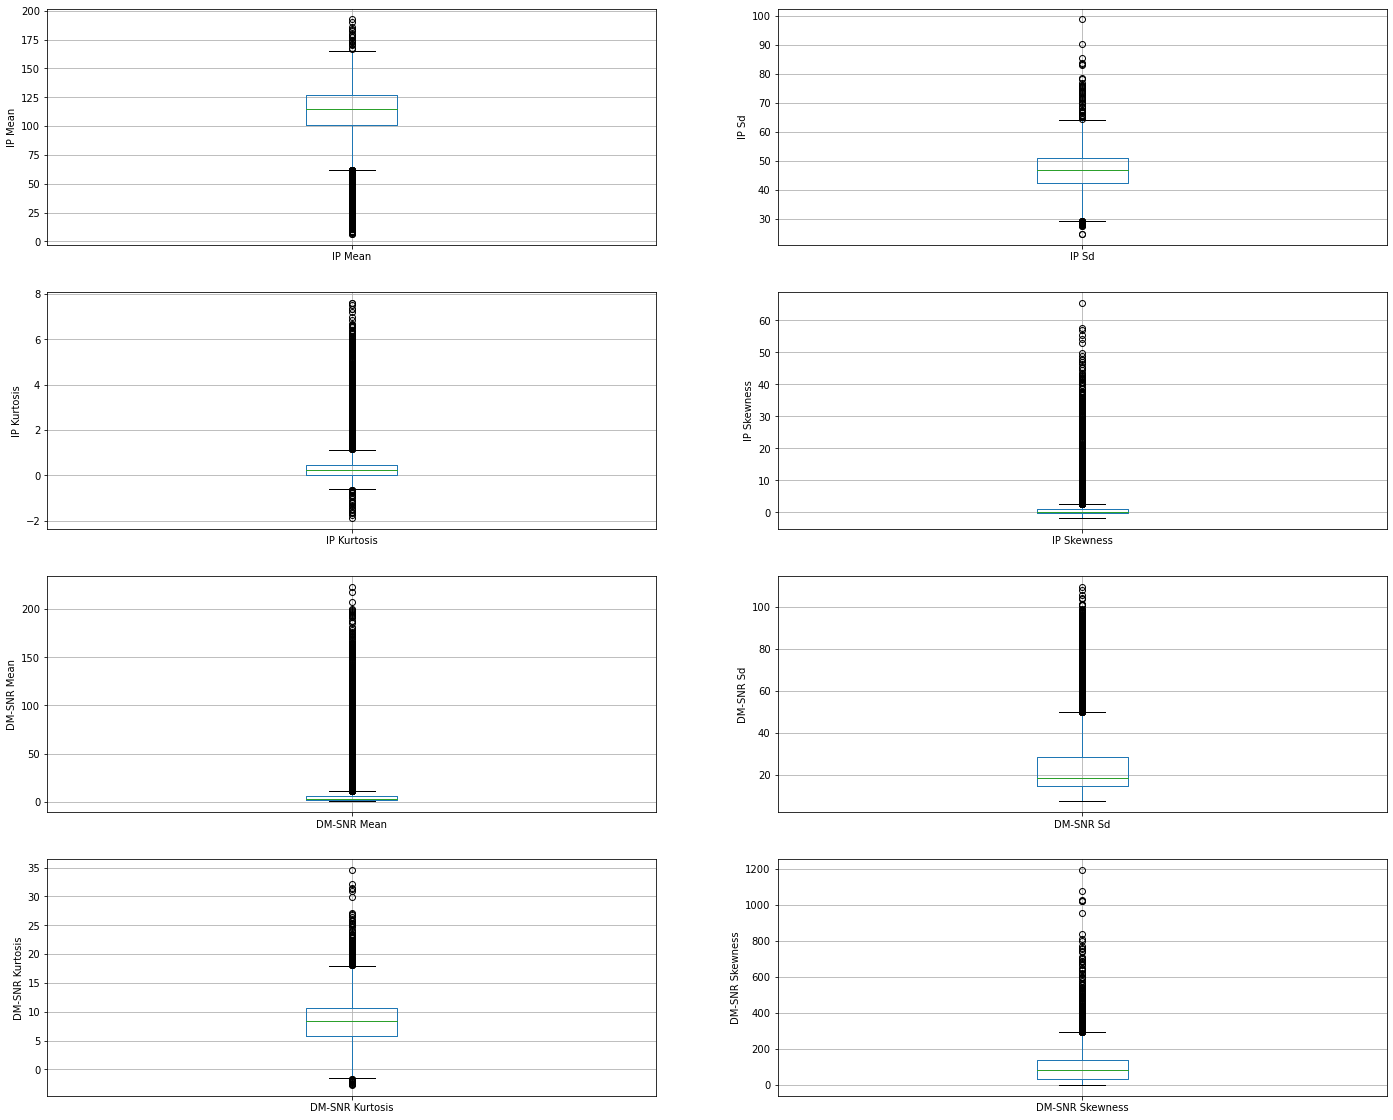

In [71]:
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = df.boxplot(column='IP Mean')
fig.set_title('')
fig.set_ylabel('IP Mean')

plt.subplot(4, 2, 2)
fig = df.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')

plt.subplot(4, 2, 3)
fig = df.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')

plt.subplot(4, 2, 4)
fig = df.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')

plt.subplot(4, 2, 5)
fig = df.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')

plt.subplot(4, 2, 6)
fig = df.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')

plt.subplot(4, 2, 7)
fig = df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')

plt.subplot(4, 2, 8)
fig = df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')

Text(0, 0.5, 'Number of pulsar stars')

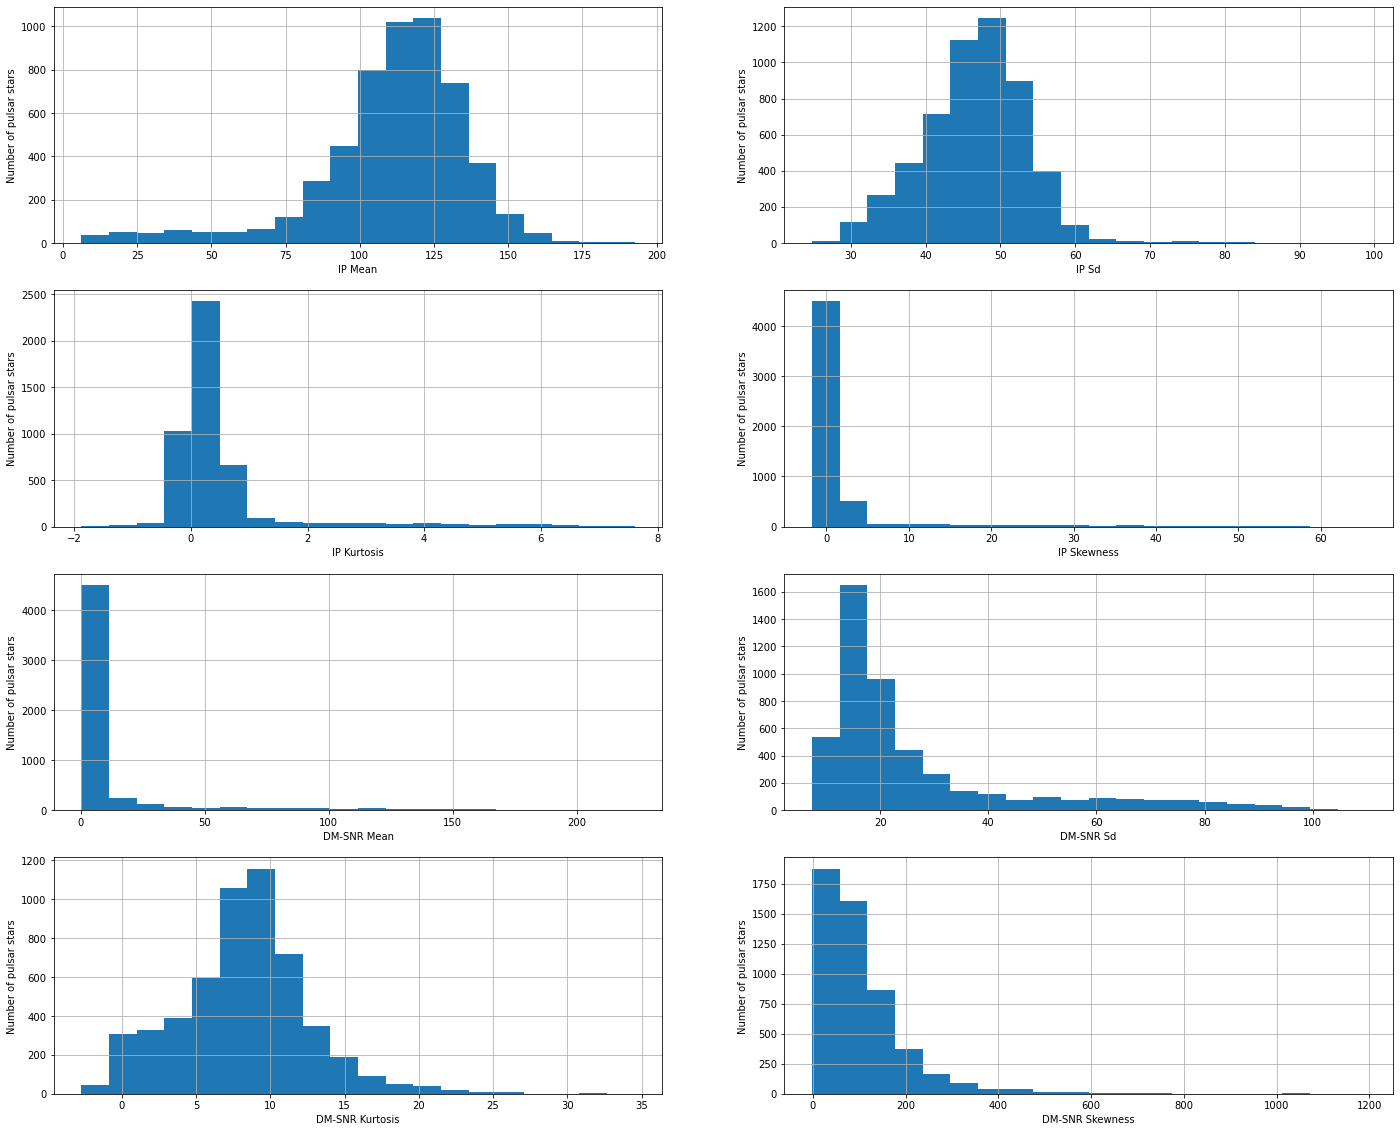

In [72]:
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = df['IP Mean'].hist(bins=20)
fig.set_xlabel('IP Mean')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 2)
fig = df['IP Sd'].hist(bins=20)
fig.set_xlabel('IP Sd')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 3)
fig = df['IP Kurtosis'].hist(bins=20)
fig.set_xlabel('IP Kurtosis')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 4)
fig = df['IP Skewness'].hist(bins=20)
fig.set_xlabel('IP Skewness')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 5)
fig = df['DM-SNR Mean'].hist(bins=20)
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 6)
fig = df['DM-SNR Sd'].hist(bins=20)
fig.set_xlabel('DM-SNR Sd')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 7)
fig = df['DM-SNR Kurtosis'].hist(bins=20)
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 8)
fig = df['DM-SNR Skewness'].hist(bins=20)
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Number of pulsar stars')

<AxesSubplot:>

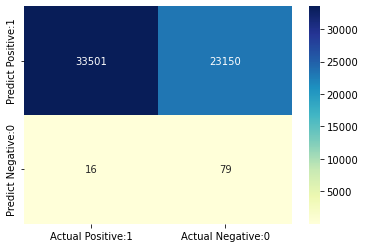

In [73]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Prof/pak mohon maaf untuk svm cuma sanggup sampain disin dulu
https://www.kaggle.com/code/prashant111/svm-classifier-tutorial/notebook

Multi-Layer Perceptron

In [81]:
import numpy as np # linear algebra
np.random.seed(10)
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Required magic to display matplotlib plots in notebooks
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
        
data = pd.read_csv('train.csv')

data.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [82]:
# We define a dictionary to transform the 0,1 values in the labels to a String that defines the fate of the passenger
dict_live = { 
    0 : 'Perished',
    1 : 'Survived'
}

# We define a dictionary to binarize the sex
dict_sex = {
    'male' : 0,
    'female' : 1
}

# We apply the dictionary using a lambda function and the pandas .apply() module
data['Bsex'] = data['Sex'].apply(lambda x : dict_sex[x])


# Now the features are a 2 column matrix whose entries are the Class (1,2,3) and the Sex (0,1) of the passengers
features = data[['Pclass', 'Bsex']].to_numpy()
labels = data['Survived'].to_numpy()

In [83]:
# Define the sigmoid activator; we ask if we want the sigmoid or its derivative
def sigmoid_act(x, der=False):
    import numpy as np
    
    if (der==True) : #derivative of the sigmoid
        f = x/(1-x)
    else : # sigmoid
        f = 1/(1+ np.exp(-x))
    
    return f

# We may employ the Rectifier Linear Unit (ReLU)
def ReLU_act(x, der=False):
    import numpy as np
    
    if (der== True):
        if x>0 :
            f= 1
        else :
            f = 0
    else :
        if x>0:
            f = x
        else :
            f = 0
    return f

# Now we are ready to define the perceptron; 
# it eats a np.array (that may be a list of features )
def perceptron(X, act='Sigmoid'): 
    import numpy as np
    
    shapes = X.shape # Pick the number of (rows, columns)!
    n= shapes[0]+shapes[1]
    # Generating random weights and bias
    w = 2*np.random.random(shapes) - 0.5 # We want w to be between -1 and 1
    b = np.random.random(1)
    
    # Initialize the function
    f = b[0]
    for i in range(0, X.shape[0]-1) : # run over column elements
        for j in range(0, X.shape[1]-1) : # run over rows elements
            f += w[i, j]*X[i,j]/n
    # Pass it to the activation function and return it as an output
    if act == 'Sigmoid':
        output = sigmoid_act(f)
    else :
        output = ReLU_act(f)
        
    return output

In [84]:
print('Output with sigmoid activator: ', perceptron(features))
print('Output with ReLU activator: ', perceptron(features))

Output with sigmoid activator:  0.8536800619299082
Output with ReLU activator:  0.8515450291672023


In [85]:
import numpy as np
# Define the sigmoid activator; we ask if we want the sigmoid or its derivative
def sigmoid_act(x, der=False):
    import numpy as np
    
    if (der==True) : #derivative of the sigmoid
        f = 1/(1+ np.exp(- x))*(1-1/(1+ np.exp(- x)))
    else : # sigmoid
        f = 1/(1+ np.exp(- x))
    
    return f

# We may employ the Rectifier Linear Unit (ReLU)
def ReLU_act(x, der=False):
    import numpy as np
    
    if (der == True): # the derivative of the ReLU is the Heaviside Theta
        f = np.heaviside(x, 1)
    else :
        f = np.maximum(x, 0)
    
    return f

In [86]:
# split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.30)

print('Training records:',Y_train.size)
print('Test records:',Y_test.size)

Training records: 623
Test records: 268


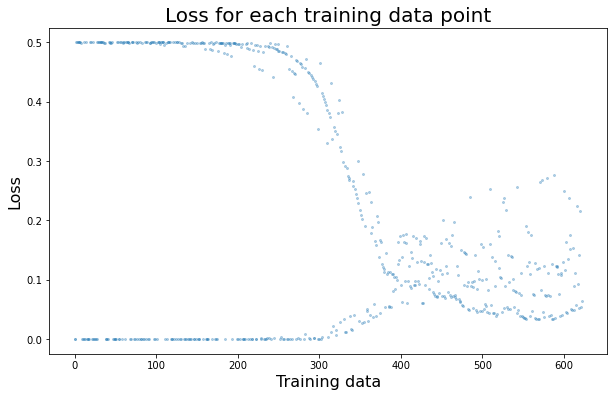

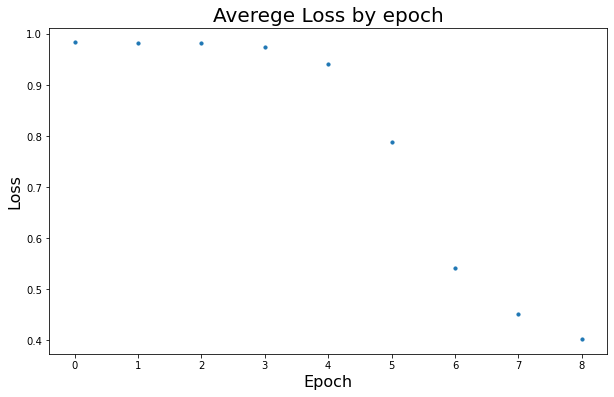

In [87]:
# Set up the number of perceptron per each layer:
p=4 # Layer 1
q=4 # Layer 2

# Set up the Learning rate
eta =  1/623

# 0: Random initialize the relevant data 
w1 = 2*np.random.rand(p , X_train.shape[1]) - 0.5 # Layer 1
b1 = np.random.rand(p)
w2 = 2*np.random.rand(q , p) - 0.5  # Layer 2
b2 = np.random.rand(q)
wOut = 2*np.random.rand(q) - 0.5  # Output Layer
bOut = np.random.rand(1)
mu = []
vec_y = []

# Start looping over the passengers, i.e. over I.

for I in range(0, X_train.shape[0]): #loop in all the passengers:
    
    # 1: input the data 
    x = X_train[I]
    # 2: Start the algorithm
    # 2.1: Feed forward
    z1 = ReLU_act(np.dot(w1, x) + b1) # output layer 1 
    z2 = ReLU_act(np.dot(w2, z1) + b2) # output layer 2
    y = sigmoid_act(np.dot(wOut, z2) + bOut) # Output of the Output layer
    #2.2: Compute the output layer's error
    delta_Out =  (y-Y_train[I]) * sigmoid_act(y, der=True)
    #2.3: Backpropagate
    delta_2 = delta_Out * wOut * ReLU_act(z2, der=True) # Second Layer Error
    delta_1 = np.dot(delta_2, w2) * ReLU_act(z1, der=True) # First Layer Error
    # 3: Gradient descent 
    wOut = wOut - eta*delta_Out*z2  # Outer Layer
    bOut = bOut - eta*delta_Out
    w2 = w2 - eta*np.kron(delta_2, z1).reshape(q,p) # Hidden Layer 2
    b2 = b2 - eta*delta_2
    w1 = w1 - eta*np.kron(delta_1, x).reshape(p, x.shape[0]) # Hidden Layer 1
    b1 = b1 - eta*delta_1
    # 4. Computation of the loss function
    mu.append((1/2)*(y-Y_train[I])**2)
    vec_y.append(y[0])

# Plotting the Cost function for each training data     
plt.figure(figsize=(10,6))
plt.scatter(np.arange(0, X_train.shape[0]), mu, alpha=0.3, s=4, label='mu')
plt.title('Loss for each training data point', fontsize=20)
plt.xlabel('Training data', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.show()
# Plotting the average cost function over 10 training data    
pino = []
for i in range(0, 9):
    pippo = 0
    for m in range(0, 59):
        pippo+=vec_y[60*i+m]/60
    pino.append(pippo)

plt.figure(figsize=(10,6))
plt.scatter(np.arange(0, 9), pino, alpha=1, s=10, label='error')
plt.title('Averege Loss by epoch', fontsize=20)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.show()

In [88]:
def ANN_train(X_train, Y_train, p=4, q=4, eta=0.0015):
    import numpy as np
    import matplotlib.pyplot as plt
    # 0: Random initialize the relevant data 
    w1 = 2*np.random.rand(p , X_train.shape[1]) - 0.5 # Layer 1
    b1 = np.random.rand(p)
    w2 = 2*np.random.rand(q , p) - 0.5  # Layer 2
    b2 = np.random.rand(q)
    wOut = 2*np.random.rand(q) - 0.5   # Output Layer
    bOut = np.random.rand(1)
    mu = []
    vec_y = []

    # Start looping over the passengers, i.e. over I.
    for I in range(0, X_train.shape[0]-1): #loop in all the passengers:
        # 1: input the data 
        x = X_train[I]
        # 2: Start the algorithm
        # 2.1: Feed forward
        z1 = ReLU_act(np.dot(w1, x) + b1) # output layer 1 
        z2 = ReLU_act(np.dot(w2, z1) + b2) # output layer 2
        y = sigmoid_act(np.dot(wOut, z2) + bOut) # Output of the Output layer
        #2.2: Compute the output layer's error
        delta_Out = 2 * (y-Y_train[I]) * sigmoid_act(y, der=True)
        #2.3: Backpropagate
        delta_2 = delta_Out * wOut * ReLU_act(z2, der=True) # Second Layer Error
        delta_1 = np.dot(delta_2, w2) * ReLU_act(z1, der=True) # First Layer Error
        # 3: Gradient descent 
        wOut = wOut - eta*delta_Out*z2  # Outer Layer
        bOut = bOut - eta*delta_Out
        w2 = w2 - eta*np.kron(delta_2, z1).reshape(q,p) # Hidden Layer 2
        b2 = b2 -  eta*delta_2
        w1 = w1 - eta*np.kron(delta_1, x).reshape(p, x.shape[0])
        b1 = b1 - eta*delta_1
        # 4. Computation of the loss function
        mu.append((y-Y_train[I])**2)
        vec_y.append(y)
    
    batch_loss = []
    for i in range(0, 10):
        loss_avg = 0
        for m in range(0, 60):
            loss_avg+=vec_y[60*i+m]/60
        batch_loss.append(loss_avg)

    plt.figure(figsize=(10,6))
    plt.scatter(np.arange(1, len(batch_loss)+1), batch_loss, alpha=1, s=10, label='error')
    plt.title('Averege Loss by epoch', fontsize=20)
    plt.xlabel('Epoch', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.show()
    
    return w1, b1, w2, b2, wOut, bOut, mu

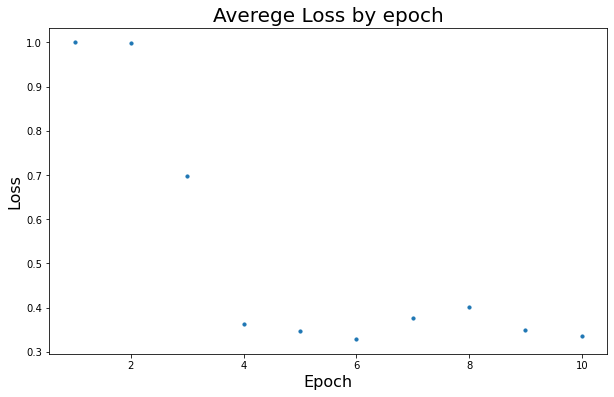

In [89]:
w1, b1, w2, b2, wOut, bOut, mu = ANN_train(X_train, Y_train, p=8, q=4, eta=0.0015)

In [90]:
def ANN_pred(X_test, w1, b1, w2, b2, wOut, bOut, mu):
    import numpy as np
    pred = []
    for I in range(0, X_test.shape[0]): #loop in all the passengers
        # 1: input the data 
        x = X_test[I]
        # 2.1: Feed forward
        z1 = ReLU_act(np.dot(w1, x) + b1) # output layer 1 
        z2 = ReLU_act(np.dot(w2, z1) + b2) # output layer 2
        y = sigmoid_act(np.dot(wOut, z2) + bOut)  # Output of the Output layer
        # Append the prediction;
        # We now need a binary classifier; we this apply an Heaviside Theta and we set to 0.5 the threshold
        # if y < 0.5 the output is zero, otherwise is 1
        pred.append( np.heaviside(y - 0.5, 1)[0] )
    
    return np.array(pred);

In [91]:
predictions = ANN_pred(X_test, w1, b1, w2, b2, wOut, bOut, mu)

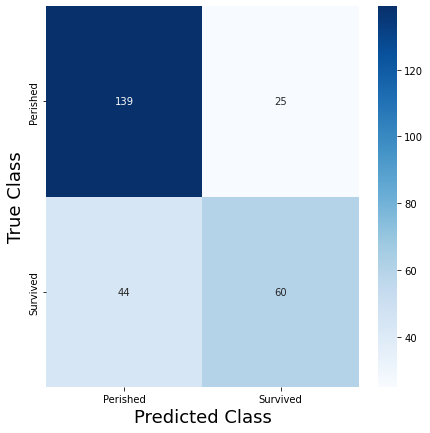

In [92]:
# Plot the confusion matrix
cm = confusion_matrix(Y_test, predictions)

df_cm = pd.DataFrame(cm, index = [dict_live[i] for i in range(0,2)], columns = [dict_live[i] for i in range(0,2)])
plt.figure(figsize = (7,7))
sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.xlabel("Predicted Class", fontsize=18)
plt.ylabel("True Class", fontsize=18)
plt.show()

Neural Network model using Keras

In [94]:
import pandas as pd
data = pd.read_csv('diabetes.csv')
x = data.drop("Outcome", axis=1)
y = data["Outcome"]

In [95]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=8, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [96]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [97]:
model.fit(x,y, epochs=150, batch_size=10)

Epoch 1/150
77/77 [==============================] - 3s 5ms/step - loss: 1.8616 - accuracy: 0.6250
Epoch 2/150
77/77 [==============================] - 0s 4ms/step - loss: 0.9874 - accuracy: 0.6484
Epoch 3/150
77/77 [==============================] - 0s 5ms/step - loss: 0.8217 - accuracy: 0.6628
Epoch 4/150
77/77 [==============================] - 0s 4ms/step - loss: 0.7538 - accuracy: 0.6471
Epoch 5/150
77/77 [==============================] - 0s 4ms/step - loss: 0.7056 - accuracy: 0.6667
Epoch 6/150
77/77 [==============================] - 0s 4ms/step - loss: 0.7121 - accuracy: 0.6589
Epoch 7/150
77/77 [==============================] - 0s 4ms/step - loss: 0.7061 - accuracy: 0.6693
Epoch 8/150
77/77 [==============================] - 0s 4ms/step - loss: 0.6844 - accuracy: 0.6615
Epoch 9/150
77/77 [==============================] - 0s 4ms/step - loss: 0.6457 - accuracy: 0.7083
Epoch 10/150
77/77 [==============================] - 0s 4ms/step - loss: 0.6552 - accuracy: 0.6810
Epoch 11/

In [98]:
_, accuracy = model.evaluate(x, y)
print("Model accuracy: %.2f"% (accuracy*100))

24/24 [==============================] - 1s 3ms/step - loss: 0.4691 - accuracy: 0.7773
Model accuracy: 77.73


In [99]:
predictions = model.predict(x)
print([round(x[0]) for x in predictions])

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 

In [100]:
model = Sequential()  #define model
model.add(Dense(12, input_dim=8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]) #compile model
model.fit(x,y, epochs=150, batch_size=10)  #training
_, accuracy = model.evaluate(x,y)    #testing
print("Model accuracy: %.2f"% (accuracy*100))
predictions = model.predict(x)     #make predictions
#round the prediction
rounded = [round(x[0]) for x in predictions]

Epoch 1/150
77/77 [==============================] - 1s 4ms/step - loss: 4.1569 - accuracy: 0.5417
Epoch 2/150
77/77 [==============================] - 0s 5ms/step - loss: 1.5295 - accuracy: 0.5482
Epoch 3/150
77/77 [==============================] - 0s 5ms/step - loss: 1.0005 - accuracy: 0.6172
Epoch 4/150
77/77 [==============================] - 0s 4ms/step - loss: 0.9300 - accuracy: 0.6198
Epoch 5/150
77/77 [==============================] - 0s 4ms/step - loss: 0.8004 - accuracy: 0.6328
Epoch 6/150
77/77 [==============================] - 0s 4ms/step - loss: 0.7238 - accuracy: 0.6497
Epoch 7/150
77/77 [==============================] - 0s 6ms/step - loss: 0.6948 - accuracy: 0.6497
Epoch 8/150
77/77 [==============================] - 0s 5ms/step - loss: 0.6695 - accuracy: 0.6562
Epoch 9/150
77/77 [==============================] - 0s 5ms/step - loss: 0.6652 - accuracy: 0.6771
Epoch 10/150
77/77 [==============================] - 0s 4ms/step - loss: 0.6552 - accuracy: 0.6628
Epoch 11/

Convolutional Neural Network

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


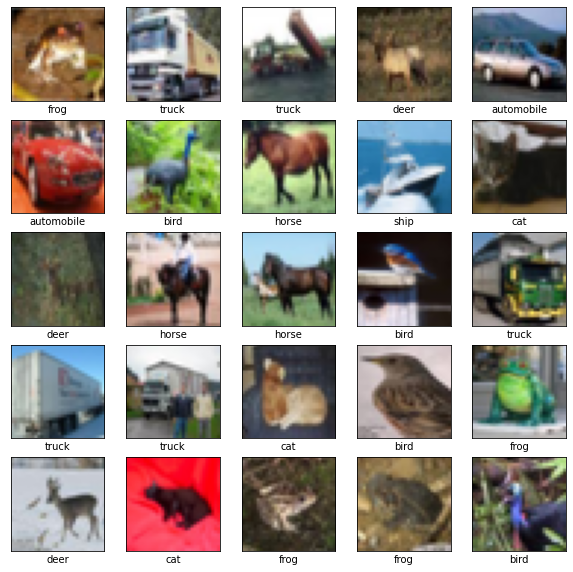

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 195s 118ms/step - loss: 1.5113 - accuracy: 0.4494 - val_loss: 1.2870 - val_accuracy: 0.5305
Epoch 2/10
1563/1563 [==============================] - 177s 113ms/step - loss: 1.1392 - accuracy: 0.5963 - val_loss: 1.0534 - val_accuracy: 0.6368
Epoch 3/10
1563/1563 [==============================] - 180s 115ms/step - loss: 0.9848 - accuracy: 0.6521 - val_loss: 0.9800 - val_accuracy: 0.6588
Epoch 4/10
1563/1563 [==============================] - 136s 87ms/step - loss: 0.8864 - accuracy: 0.6900 - val_loss: 0.9930 - val_accuracy: 0.6612
Epoch 5/10
1563/1563 [==============================] - 126s 81ms/step - loss: 0.8137 - accuracy: 0.7148 - val_loss: 0.8816 - val_accuracy: 0.6960
Epoch 6/10
1563/1563 [==============================] - 126s 81ms/step - loss: 0.7497 - accuracy: 0.7381 - val_loss: 0.8651 - val_accuracy: 0.7014
Epoch 7/10
1563/1563 [==============================] - 126s 81ms/step - loss: 0.6970 - accuracy: 0.7549 - val_loss

313/313 - 8s - loss: 0.8794 - accuracy: 0.7182 - 8s/epoch - 25ms/step


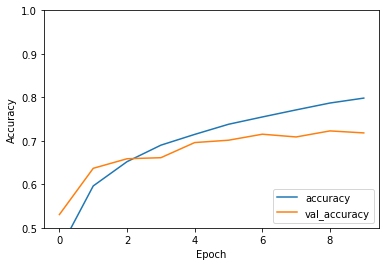

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [12]:
print(test_acc)

0.7182000279426575
